 This project involves simulating the Boltzamann Distibution using billard Balls as gas particles

In [1]:
# Importing the required Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import animation
from matplotlib.animation import PillowWriter
plt.style.use(['science', 'notebook'])
from itertools import combinations

Define number of particles and get random positions (between 0 and 1) for each particle

In [2]:
n_particles = 16
r = np.random.random((2,n_particles))
# Color particles to differentiate them at either side
ixr = r[0]>0.5 # right
ixl = r[0]<=0.5 #left

Give ID's to each particle - this creates an order list of the particles and will be useful for combinatorics

In [3]:
ids = np.arange(n_particles)

In [4]:
ids # Showing the different ID's of the 400 particles

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Plot initial configuaration of particles

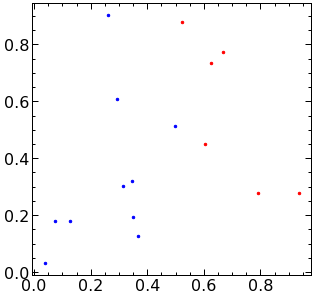

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(r[0][ixr],r[1][ixr], color='r', s=6)
plt.scatter(r[0][ixl],r[1][ixl], color='b', s=6)

As we can see from the above plot we have 2 sides as we declared before , right and left , with 2 different colors , red and blue respectively.

Every time we run this particular cell , due to the random nature we declare we will be seeing different results

Obtain the initial velocities in the gas.

All the red one will move to the left and all the blue ones will move to the right.

Note we will assume that the particles in the gas will move at approximately 500 m/s according to google

As a note gas particles have different speed, therefore we find the 'root mean square' value of the speed of gas particles.

This can be calculated using:

1/2 mv^2 = 3/2 k(B)T

In [6]:
# Initializing x and y velocities to 0
v = np.zeros((2,n_particles))

In [7]:
# Creating the initila velocities
v[0][ixr] = -500 # refers to x velocity
v[0][ixl] = 500 # refers to y velocity

In [8]:
#v

PART 1: Distance Between all Pairs

To determine if 2 particles collide, we need to find the disntance between all pairs of particles.

Imagine 2 spheres with a radius (r) colliding. At the point of collision the distance between the 2 spheres is less than 2 times he radius of each particle, they collide with.

Using combinatorics , we can say that if there are n particles there are n(n-1)/2 pairs.

This is were the ID part we declared comes in handy.

In [9]:
# Lets see a list of the IDs pairs:

list(combinations(ids,2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (7, 12),
 (7, 13),
 (7, 14),
 (7, 15),
 (8, 9),
 (8, 10),
 (8, 11),
 (8, 12),
 (8, 13),
 (8, 14),
 (8, 15),
 (9, 10),
 (9, 11),
 (9, 12),
 (9, 13),
 (9, 14),
 (9, 

In [10]:
# Convert the list into an array
ids_pairs=np.asarray(list(combinations(ids,2)))
ids_pairs

array([[ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  4],
       [ 0,  5],
       [ 0,  6],
       [ 0,  7],
       [ 0,  8],
       [ 0,  9],
       [ 0, 10],
       [ 0, 11],
       [ 0, 12],
       [ 0, 13],
       [ 0, 14],
       [ 0, 15],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 1, 11],
       [ 1, 12],
       [ 1, 13],
       [ 1, 14],
       [ 1, 15],
       [ 2,  3],
       [ 2,  4],
       [ 2,  5],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 10],
       [ 2, 11],
       [ 2, 12],
       [ 2, 13],
       [ 2, 14],
       [ 2, 15],
       [ 3,  4],
       [ 3,  5],
       [ 3,  6],
       [ 3,  7],
       [ 3,  8],
       [ 3,  9],
       [ 3, 10],
       [ 3, 11],
       [ 3, 12],
       [ 3, 13],
       [ 3, 14],
       [ 3, 15],
       [ 4,  5],
       [ 4,  6],
       [ 4,  7],
       [ 4,  8],
       [ 4,  9

Now , we need to obtain the distances between the particles in a similar fashion

X-position of the particles

In [11]:
x_pairs = np.asarray(list(combinations(r[0],2)))
x_pairs

array([[0.0739902 , 0.36799237],
       [0.0739902 , 0.6244173 ],
       [0.0739902 , 0.29254838],
       [0.0739902 , 0.34723317],
       [0.0739902 , 0.31480172],
       [0.0739902 , 0.60288647],
       [0.0739902 , 0.12794156],
       [0.0739902 , 0.49765933],
       [0.0739902 , 0.66688329],
       [0.0739902 , 0.79278728],
       [0.0739902 , 0.52368348],
       [0.0739902 , 0.34844703],
       [0.0739902 , 0.03909879],
       [0.0739902 , 0.26098189],
       [0.0739902 , 0.93541918],
       [0.36799237, 0.6244173 ],
       [0.36799237, 0.29254838],
       [0.36799237, 0.34723317],
       [0.36799237, 0.31480172],
       [0.36799237, 0.60288647],
       [0.36799237, 0.12794156],
       [0.36799237, 0.49765933],
       [0.36799237, 0.66688329],
       [0.36799237, 0.79278728],
       [0.36799237, 0.52368348],
       [0.36799237, 0.34844703],
       [0.36799237, 0.03909879],
       [0.36799237, 0.26098189],
       [0.36799237, 0.93541918],
       [0.6244173 , 0.29254838],
       [0.

Hence now we can always be in the same page, for example 
[0.25174482, 0.73790909] belongs to the particle at index [  0,   3],

Now in order to take the distance between them , we need to take the difference between the pairs

In [12]:
dx_pairs = np.diff(x_pairs,axis=1).ravel() # We take the difference along axis 1 (rows)
dx_pairs

array([ 0.29400217,  0.5504271 ,  0.21855818,  0.27324297,  0.24081152,
        0.52889628,  0.05395136,  0.42366914,  0.5928931 ,  0.71879708,
        0.44969328,  0.27445684, -0.0348914 ,  0.18699169,  0.86142899,
        0.25642493, -0.07544399, -0.0207592 , -0.05319065,  0.2348941 ,
       -0.24005081,  0.12966696,  0.29889092,  0.42479491,  0.15569111,
       -0.01954534, -0.32889358, -0.10701048,  0.56742681, -0.33186892,
       -0.27718413, -0.30961558, -0.02153083, -0.49647574, -0.12675796,
        0.04246599,  0.16836998, -0.10073382, -0.27597026, -0.5853185 ,
       -0.36343541,  0.31100189,  0.0546848 ,  0.02225334,  0.3103381 ,
       -0.16460682,  0.20511096,  0.37433492,  0.5002389 ,  0.2311351 ,
        0.05589866, -0.25344958, -0.03156649,  0.64287081, -0.03243145,
        0.2556533 , -0.21929161,  0.15042616,  0.31965012,  0.44555411,
        0.17645031,  0.00121386, -0.30813438, -0.08625128,  0.58818601,
        0.28808475, -0.18686016,  0.18285762,  0.35208157,  0.47

Therefore the Total Distance 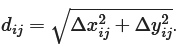

In [13]:
x_pairs = np.asarray(list(combinations(r[0],2)))
y_pairs = np.asarray(list(combinations(r[1],2)))
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dy_pairs = np.diff(y_pairs, axis=1).ravel()
d_pairs = np.sqrt(dx_pairs**2 + dy_pairs**2)
d_pairs

array([0.29882491, 0.78135768, 0.48273095, 0.30755722, 0.27057719,
       0.59376851, 0.0539663 , 0.53915121, 0.84014672, 0.72576015,
       0.83113715, 0.27481874, 0.14944523, 0.74675176, 0.8670122 ,
       0.65990048, 0.48973622, 0.19574665, 0.18467284, 0.39965487,
       0.24621302, 0.40806889, 0.71426566, 0.45176719, 0.7683828 ,
       0.07033933, 0.34147691, 0.78377048, 0.58735667, 0.35433121,
       0.49772467, 0.53083983, 0.28551481, 0.74339167, 0.25487778,
       0.05880645, 0.4844773 , 0.17606636, 0.60685274, 0.91238112,
       0.40054982, 0.5522361 , 0.29437141, 0.30784874, 0.34940822,
       0.45963615, 0.22687845, 0.40901833, 0.59935243, 0.35432289,
       0.42005695, 0.62905302, 0.2942388 , 0.72362237, 0.03699315,
       0.28621949, 0.26011846, 0.24412777, 0.55530509, 0.4474256 ,
       0.58504465, 0.12707934, 0.42073984, 0.58814683, 0.5897511 ,
       0.32319201, 0.22321922, 0.27850927, 0.5887505 , 0.47854267,
       0.61232669, 0.11433988, 0.38497714, 0.60199466, 0.62112

In [14]:
d_pairs.shape

(120,)

Part 2: Velocities of a Collision

So at each iteration of the simulation, we evaluated d_pairs.

Note: We take into account that the collision between the particles is elastic meaning no energy is lost ( conservation of energy, momentum , angular momentum)

We can find this by calculating the final velocity between the collision using the momentum formula

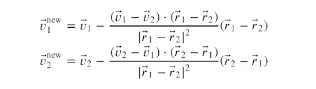

In [15]:
radius = 0.06 # Declare a small enough variable
ids_pairs_collide = ids_pairs[d_pairs < 2*radius]
ids_pairs_collide

array([[ 0,  7],
       [ 1, 12],
       [ 2,  9],
       [ 4,  5],
       [ 5, 12]])

In [16]:
ids_pairs_collide < 2*0.06

array([[ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

Thefore we have now figures out which partciles are colliding with each other.

Now we need to change there final velocities and positions

In [17]:
# Note: ==> First column
ids_pairs_collide[:,0]

array([0, 1, 2, 4, 5])

In [18]:
v1 = v[:,ids_pairs_collide[:,0]]
v2 = v[:,ids_pairs_collide[:,1]]
r1 = r[:,ids_pairs_collide[:,0]]
r2 = r[:,ids_pairs_collide[:,1]]

Since we are dealing with vectors we need to do the dot-product.
We need to put our data in Matrix form which therefore will be easier to perfom dot-product

In [19]:
(v1-v2).T@(r1-r2)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [20]:
v1new = v1 - np.diag((v1-v2).T@(r1-r2))/np.sum((r1-r2)**2, axis=0) * (r1-r2)
v2new = v2 - np.diag((v1-v2).T@(r2-r1))/np.sum((r1-r2)**2, axis=0) * (r2-r1)

In [21]:
v1new

array([[ 500.,  500., -500.,  500.,  500.],
       [   0.,    0.,    0.,    0.,    0.]])

Part 3: Functions to Run Simulation

In [22]:
def get_delta_pairs(x):
    return np.diff(np.asarray(list(combinations(x,2))), axis=1).ravel()

def get_deltad_pairs(r):
    return np.sqrt(get_delta_pairs(r[0])**2 + get_delta_pairs(r[1])**2)

def compute_new_v(v1, v2, r1, r2):
    v1new = v1 - np.diag((v1-v2).T@(r1-r2))/np.sum((r1-r2)**2, axis=0) * (r1-r2)
    v2new = v2 - np.diag((v2-v1).T@(r2-r1))/np.sum((r2-r1)**2, axis=0) * (r2-r1)
    return v1new, v2new

# Creating a 3D array , time(t),x,y,
def motion(r, v, id_pairs, ts, dt, d_cutoff):
    rs = np.zeros((ts, r.shape[0], r.shape[1]))
    vs = np.zeros((ts, v.shape[0], v.shape[1]))
    # Initial State
    rs[0] = r.copy()
    vs[0] = v.copy()
    for i in range(1,ts):
        # Index Collision
        ic = id_pairs[get_deltad_pairs(r) < d_cutoff]
        v[:,ic[:,0]], v[:,ic[:,1]] = compute_new_v(v[:,ic[:,0]], v[:,ic[:,1]], r[:,ic[:,0]], r[:,ic[:,1]])
        # Particles not leaving the box
        v[0,r[0]>1] = -np.abs(v[0,r[0]>1])
        v[0,r[0]<0] = np.abs(v[0,r[0]<0])
        v[1,r[1]>1] = -np.abs(v[1,r[1]>1])
        v[1,r[1]<0] = np.abs(v[1,r[1]<0])
        
        r = r + v*dt
        rs[i] = r.copy() # Append i=time array
        vs[i] = v.copy()
    return rs, vs

We set the radius to 0.06 as before and we find all the positions of all particles as a function of time rs where each axis is (t,x,y)

In [23]:
radius = 0.06
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

Plot the red and blue particles

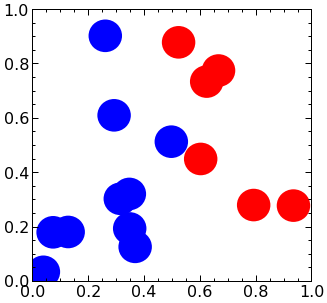

In [24]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xred, yred = rs[0][0][ixr], rs[0][1][ixr]
xblue, yblue = rs[0][0][ixl],rs[0][1][ixl]
circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
ax.add_collection(cred)
ax.add_collection(cblue)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

Now we want to create an animation to animate the above figure and the concept

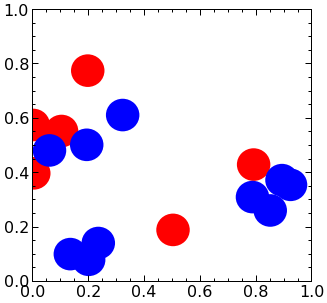

In [25]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

def animate(i):
    ax.clear()
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani3.gif',writer='pillow',fps=30,dpi=100)

Now that we have confirmed that the simulation is working correctly , lets try the simulation containing more particles

In [26]:
n_particles = 400
r = np.random.random((2,n_particles))
ixr = r[0]>0.5 
ixl = r[0]<=0.5 
ids = np.arange(n_particles)
ids_pairs = np.asarray(list(combinations(ids,2)))
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500
radius = 0.0015
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

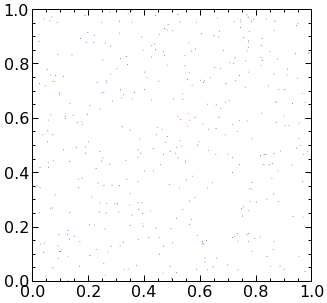

In [27]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani4.gif',writer='pillow',fps=30,dpi=100)

So we are finally reaching the conclusion of the intial concept, which was to compare the final velocity distribution of the particles with the Maxwell-Boltzmann distribution in 2D

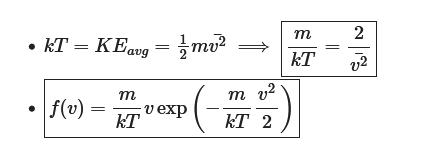

In [28]:
v = np.linspace(0,2000,1000)
a = 2/500**2
fv = a*v*np.exp(-a*v**2 / 2)

Plotting the final Histrogram next to this curve

Text(0, 0.5, '# Particles')

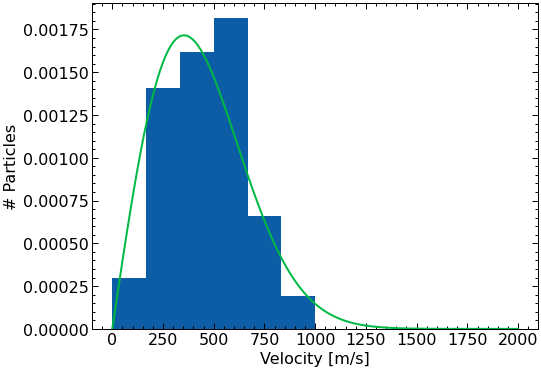

In [29]:
bins = np.linspace(0,1500,10)
plt.figure()
plt.hist(np.sqrt(np.sum(vs[400]**2, axis=0)), bins=bins, density=True)
plt.plot(v,fv)
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')

Finally we can make an animation of the moving gas particles and the histogram at the same time

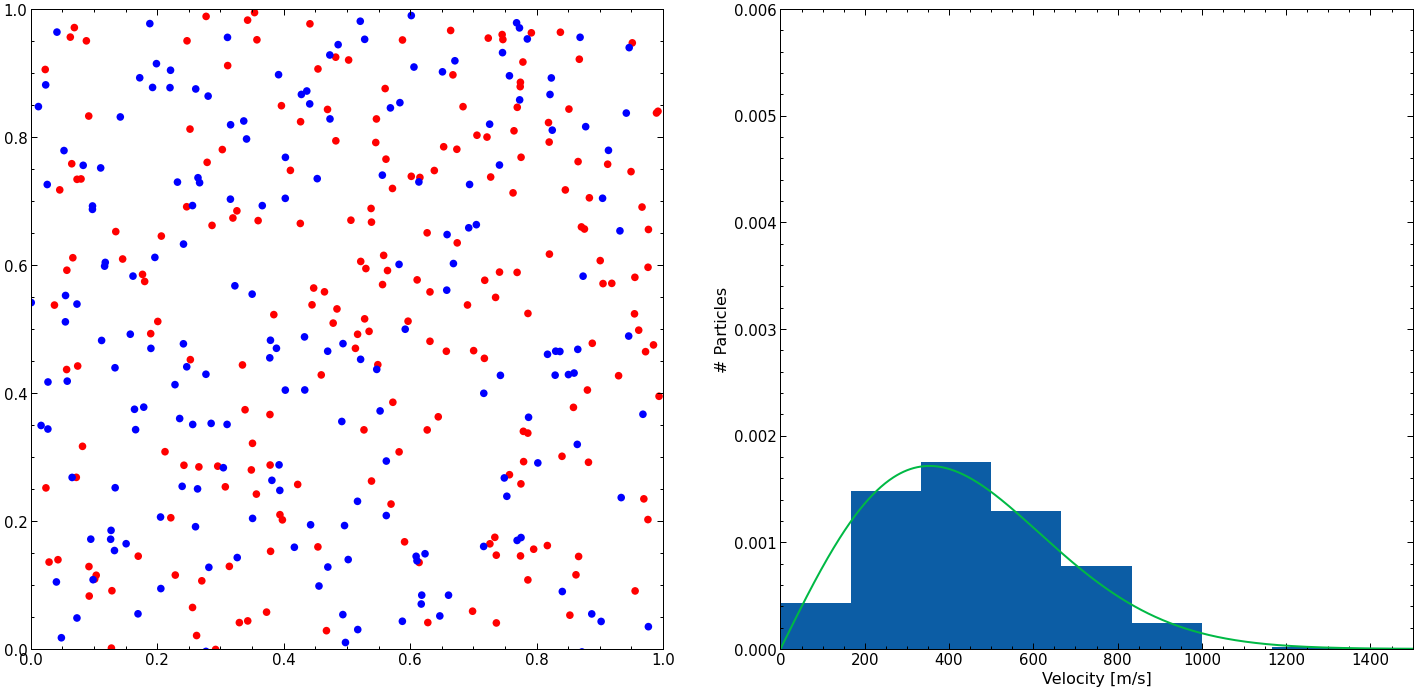

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

def animate(i):
    [ax.clear() for ax in axes]
    ax = axes[0]
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax = axes[1]
    ax.hist(np.sqrt(np.sum(vs[i]**2, axis=0)), bins=bins, density=True)
    ax.plot(v,fv)
    ax.set_xlabel('Velocity [m/s]')
    ax.set_ylabel('# Particles')
    ax.set_xlim(0,1500)
    ax.set_ylim(0,0.006)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    fig.tight_layout()
    
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani.gif',writer='pillow',fps=30,dpi=100)